<a href="https://colab.research.google.com/github/ahadanzar/Facialrecog/blob/main/Extra/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install cmake
!pip3 install face_recognition
!pip3 install numpy
!pip3 install dlib
!pip3 install opencv-python

In [2]:
import face_recognition as fr
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [9]:
#training
path = "./train/"
known_names = []
known_name_encodings = []
images = os.listdir(path)
for _ in images:
  if _[-4:]=='.jpg':
    image = fr.load_image_file(path + _)
    image_path = path + _
    encoding = fr.face_encodings(image)[0]
    known_name_encodings.append(encoding)
    known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

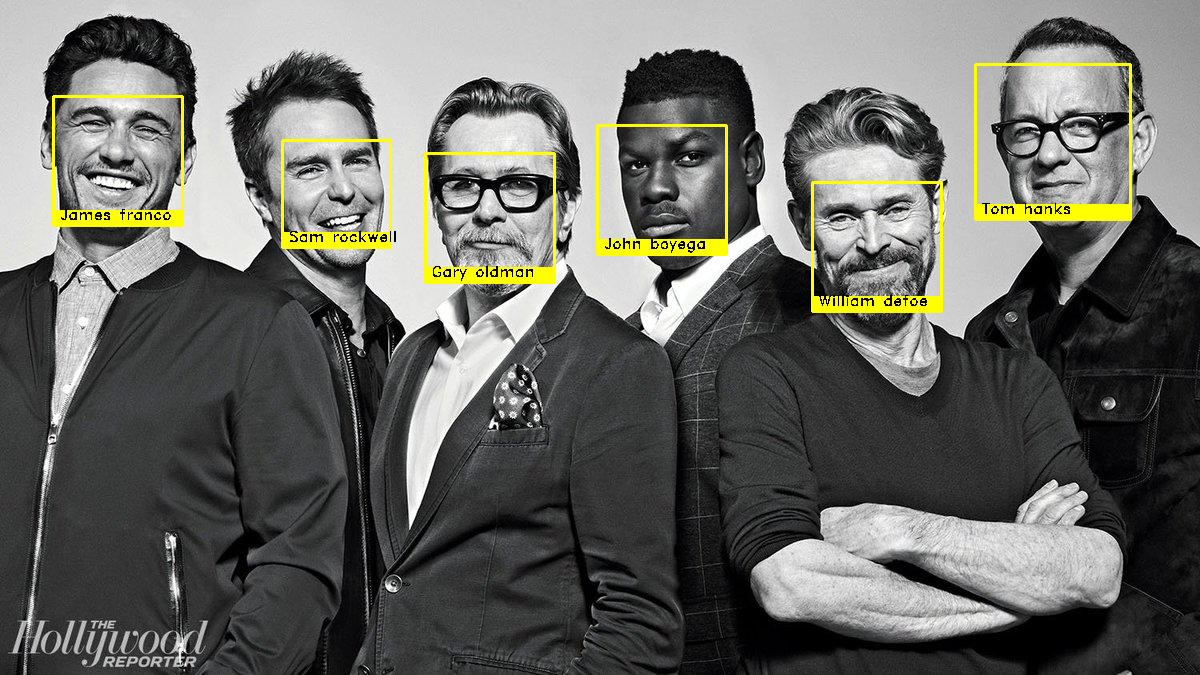

In [10]:
#testing
test_image = "./test/test1.jpg"
image = cv2.imread(test_image)
face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
   matches = fr.compare_faces(known_name_encodings, face_encoding)
   name = ""
   face_distances = fr.face_distance(known_name_encodings, face_encoding)
   best_match = np.argmin(face_distances)
   if matches[best_match]:
       name = known_names[best_match]
   cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 255), 2)
   cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 255, 255), cv2.FILLED)
   font = cv2.FONT_HERSHEY_DUPLEX
   cv2.putText(image, name, (left + 6, bottom - 6), font, 0.5, (0, 0, 0), 1)
cv2_imshow(image)